<a href="https://colab.research.google.com/github/yeonmi02/deep-learning-practice/blob/main/250409_back_propagration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화 함수

In [1]:
import numpy as np

# 활성화 함수 (시그모이드)와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

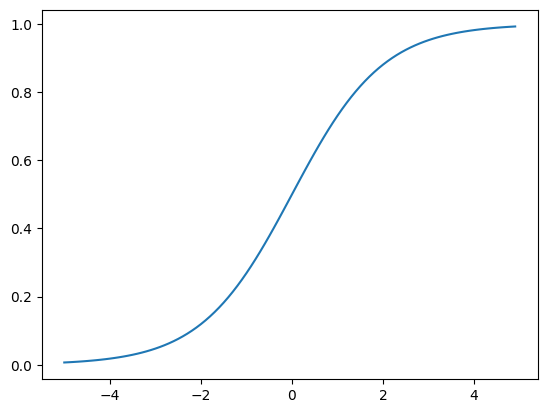

In [2]:
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
plt.plot(x, sigmoid(x))
plt.show()

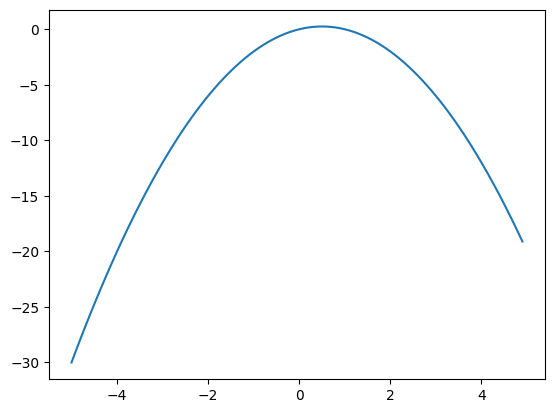

In [3]:
plt.plot(x, sigmoid_derivative(x))
plt.show()

# 다층 퍼셉트론 클래스 역전파

1. output_error : 실제 값과 예측 값의 차이로 계산

2. output_delta : 출력층 오차에 활성화 함수의 미분을 곱한 값
출력층에서의 오차를 기반으로 가중치를 얼마나 조정해야 하는지 결정

3. hidden_error : 출력층 델타를 출력층 가중치 전치와 곱하여 계산
출력층에서 발생한 오차를 은닉층으로 전파한 값

4. hidden_delta : 은닉층 오차에 활성화 함수의 미분을 곱한 값입니다.
은닉층에서의 오차를 기반으로 가중치를 얼마나 조정해야 하는지 결정

5. 가중치와 바이어스는 각각의 델타 값에 학습률을 곱하여 업데이트

In [4]:

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # 가중치 초기화
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
        self.bias_output = np.random.uniform(-1, 1, (1, output_size))

    def forward(self, X):
        # 순전파
        self.input = X
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, y, output, learning_rate):
        # 출력층 오차 계산
        output_error = y - output  # 실제 값과 예측 값의 차이
        output_delta = output_error * sigmoid_derivative(output)  # 출력층의 오차에 활성화 함수의 미분 적용

        # 은닉층 오차 계산
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)  # 출력층 오차를 은닉층으로 전파
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)  # 은닉층의 오차에 활성화 함수의 미분 적용

        # 가중치와 바이어스 업데이트
        # 은닉층 -> 출력층 가중치 업데이트
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        # 입력층 -> 은닉층 가중치 업데이트
        self.weights_input_hidden += np.dot(self.input.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)  # 순전파
            self.backward(y, output, learning_rate)  # 역전파
            if epoch % 1000 == 0:
                loss = np.mean((y - output) ** 2)  # 손실 계산 (평균 제곱 오차)
                print(f"Epoch {epoch}, Loss: {loss}")

In [5]:
# XOR 데이터셋 정의
XOR_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 입력값
XOR_y = np.array([[0], [1], [1], [0]])  # XOR 출력값

In [6]:
# 모델 초기화
mlp = MLP(input_size=2, hidden_size=2, output_size=1)

In [7]:
# 모델 학습
mlp.train(XOR_X, XOR_y, epochs=10000, learning_rate=0.1)

Epoch 0, Loss: 0.26277630916888434
Epoch 1000, Loss: 0.2409470189497056
Epoch 2000, Loss: 0.1944286669652678
Epoch 3000, Loss: 0.15853861369257677
Epoch 4000, Loss: 0.1428767733984982
Epoch 5000, Loss: 0.1363580280340411
Epoch 6000, Loss: 0.1331036605912081
Epoch 7000, Loss: 0.13121166526602804
Epoch 8000, Loss: 0.12999209980335835
Epoch 9000, Loss: 0.12914749504365713


In [8]:
# 예측 결과 출력
predictions = mlp.forward(XOR_X)
print("XOR 문제 예측 결과:")
print(predictions.round())  # 0 또는 1로 반올림

XOR 문제 예측 결과:
[[0.]
 [1.]
 [1.]
 [1.]]
